# Python in Jupyter Notebooks

A jupyter notebook is an interactive environment for running **python** code (and more). It is divided in *cells* that can be executed individually in the same interactive session. This enables quick experimentation and allows you to also add explanations (like this cell just did). 

<img src="https://storage.googleapis.com/kaggle-forum-message-attachments/703594/14673/DATAAC.jpeg" alt="meme" style="width:600px">

Click on the next cell and run it using ```SHIFT+ENTER```

In [1]:
print("Look at me! I am the data scientist now!")

Look at me! I am the data scientist now!


Let's get a bit used to writing python code by doing a few exercises:

### Pascal's Triangle
Complete the function that prints a pascal triangle, as in the example below:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/PascalTriangleAnimated2.gif" alt="Pascal">

Use this formula for computing the value of the element $ C(i, j)  = \frac{i!}{ (i-j)! * j! }$, where i is the row number and j is the column number.

```py
>>> pascal_triangle(5)
1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
```

Using the factorial function defined below implement the ```pascal_triangle``` function.

> Hint: check out the ```print``` function documentation [here](https://docs.python.org/3/library/functions.html#print) if you don't know how to make it not add the ```endline``` character after every call.

In [2]:
def factorial(x):
    """Returns the factorial of x"""
    result = 1
    for i in range(x):
        result *= i+1
    return result
    

def pascal_triangle(n):
    """Function that prints `n` rows of a Pascal triangle"""
    for i in range(n):
        for j in range(i+1):
            print("%d"%(factorial(i)/(factorial(i-j)*factorial(j))), end=" ")
        print()
    pass


Let's check our results

In [3]:
pascal_triangle(5)

1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 


### Monte Carlo estimation of $\pi$

Let's import the ```random``` library and do some basic list manipulation. 

In [4]:
# import the `random` python standard library
import random

# print a random real number betwwen 0 and 1
print(random.random())

# define an empty list
samples = []

# make a list of 3 random numbers
for i in range(3):
    samples.append(random.random())

# print the list
print(samples)

# create the same list using `comprehensions`
samples = [random.random() for _ in range(3)]
print(samples)

0.08660877767022968
[0.9834022431957623, 0.44889595560267337, 0.48685013435585267]
[0.5703430358044571, 0.8233060985398555, 0.008530543716158023]


> Note that when creating any for loop you can replace the index variable with ```_``` if you are not going to use it and don't want it declared.

Considering a circle of diameter 1 inside of a square of length 1, we can sample random points inside the square count how many are also inside the circle:

<img src="https://www.101computing.net/wp/wp-content/uploads/estimating-pi-monte-carlo-method.png" alt="visual_example" style="width:400">

$\frac{N_\text{inside}}{N_\text{total}} \approx \frac{S_\text{circle}}{S_\text{square}} = \frac{\pi r^2}{4 r^2} \Rightarrow \pi \approx \frac{4 N_\text{inside}}{N_\text{total}}$

Now complete the following function in order to return an approximation of $\pi$ based on ```n``` random numbers. 

In [5]:
def approx_pi(n):
    i = 0
    for _ in range(n):
        x = random.random()
        y = random.random()
        if((x**2+y**2 )<=1):
            i += 1
    return 4*i/n

In [6]:
pis = [ approx_pi(10), approx_pi(100), approx_pi(1000),
        approx_pi(10_000), approx_pi(100_000),  approx_pi(1_000_000)]
print(pis)

[2.0, 3.24, 3.092, 3.1564, 3.1358, 3.139924]


> Tip: you can add underscores to separate long numbers. They will be ignored by the interpreter, but they add clarity to your code

In [7]:
# python basic math library
import math

# calculate the approximation errors
errors = []
for approx in pis:
    errors.append(abs(math.pi - approx))
#print(errors)

# BONUS: can you compute the erros using list comprehensions?
errors = [abs(math.pi - approx) for approx in pis]
print(errors)

[1.1415926535897931, 0.0984073464102071, 0.049592653589793034, 0.014807346410206979, 0.005792653589792973, 0.0016686535897929566]


### Making simple plots 

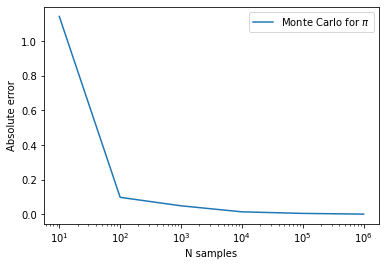

In [8]:
import matplotlib.pyplot as plt

# the x-axis value
n_samples = [10, 100, 1000, 10_000, 
            100_000, 1_000_000]


plt.figure()                                    # defining a figure
plt.plot(n_samples, errors,                     # data for x and y axis
            label="Monte Carlo for $\pi$")      # label visible in legend
plt.xscale("log")                               # logarithmic scale on x
plt.xlabel("N samples")                         
plt.ylabel("Absolute error")
plt.legend()                                    # enable the legend
plt.show()                                      # show the figure

### The elephant in the room

Python is **slow** !!! You can never come close to C++ performance for computation heavy tasks. But not all hope is lost, you can use *C++/Fortran* libraries inside python.

**numpy** is a library that has python wrappers to C++ compute code. Let's take a look 

In [9]:
import numpy as np


In [10]:
# Monte Carlo pi with numpy
def approx_pi_fast(n):
    x = np.random.random(n)
    y = np.random.random(n)
    d = x**2+y**2
    inside = (d<=1.0).sum()

    return 4*inside/n


Let's see how much faster we can get

In [17]:
n = 10
%time approx_pi(n)
%time approx_pi_fast(n)

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 16 µs
CPU times: user 69 µs, sys: 14 µs, total: 83 µs
Wall time: 73.9 µs


2.4

### Homework
Make a plot of the execution time for ```approx_pi``` and ```approx_pi_fast``` for various number of samples. 1-10000000. Use the [timeit](https://docs.python.org/3/library/timeit.html) package.

**Bonus:** Include the error bars for the measurement.

In [51]:
import timeit
pis=[]
pis_fast=[]
t=[]
t_fast=[]
x=[]
errors=[]
for i in np.logspace(start=1, stop=7, num=7 ):
    #%time pis.append(approx_pi(int(i)))
    #%time pis_fast.append(approx_pi_fast(int(i)))
    x.append(i)
    t.append(timeit.timeit('pis.append(approx_pi(int(i)))', number=1, globals=globals()))
    t_fast.append(timeit.timeit('pis_fast.append(approx_pi_fast(int(i)))', number=1, globals=globals()))
print(pis)
print(pis_fast)
print(t)
print(t_fast)
#errors = [abs(math.pi - approx) for approx in pis]
for approx in pis:
    errors.append(abs(math.pi - approx))
errors_fast = [abs(math.pi - approx) for approx in pis_fast]

[4.0, 3.0, 3.224, 3.164, 3.13836, 3.143512, 3.1411844]
[3.6, 3.12, 3.092, 3.1608, 3.14392, 3.14048, 3.14169]
[1.1653999990812736e-05, 4.7464000090258196e-05, 0.0004433999999946536, 0.0044558029999279825, 0.041815349999978935, 0.30795191099991825, 2.902698674000021]
[5.116600004839711e-05, 3.931599985662615e-05, 7.157699997151212e-05, 0.0009514299999864306, 0.0020674630000030447, 0.020635996999999406, 0.22981351599992195]


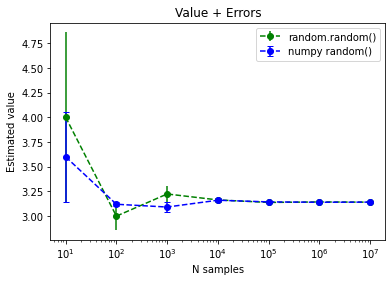

In [52]:
plt.figure()                                    # defining a figure
plt.errorbar(x, pis, fmt='go--',  label="random.random()", yerr=errors)      # label visible in legend
plt.errorbar(x, pis_fast, fmt='bo--',label="numpy random()", yerr=errors_fast, capsize=3)
plt.xscale("log")                               # logarithmic scale on x
#plt.yscale("log")
plt.xlabel("N samples")                         
plt.ylabel("Estimated value")
plt.legend()                                    # enable the legend
plt.title("Value + Errors")
plt.show()  

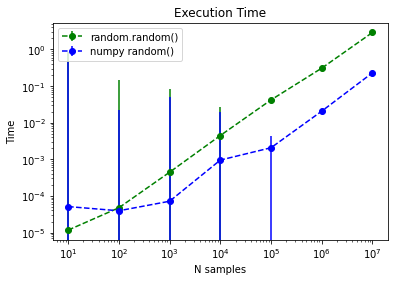

In [55]:
plt.figure()                                    # defining a figure
plt.errorbar(x, t, fmt='go--', label="random.random()", yerr=errors)      # label visible in legend
plt.errorbar(x, t_fast, fmt='bo--', label="numpy random()", yerr=errors_fast)
plt.xscale("log")                               # logarithmic scale on x
plt.yscale("log")
plt.xlabel("N samples")                         
plt.ylabel("Time")
plt.legend()                                    # enable the legend
plt.title("Execution Time")
plt.show()  